In [8]:
import random

import numpy as np

from environment import Easy21Environment, Easy21State

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

In [15]:
def plotQ( z ):
    x = range( z.shape[ 1 ] )
    y = range( z.shape[ 0 ] )
    X, Y = np.meshgrid( x, y )
    
    fig = plt.figure()
    ax = Axes3D( fig )
    ax.plot_wireframe( X, Y, z )

[2 7 0]
[ 2 13  0]
[ 2 15  0]
[ 2 13  0]
[ 2 15  0]
[ 2 11  0]
[2 1 0]
[2 7 0]
[2 8 0]
[ 2 13  0]
[ 2 16  0]
[ 2 20  1]


<IPython.core.display.Javascript object>


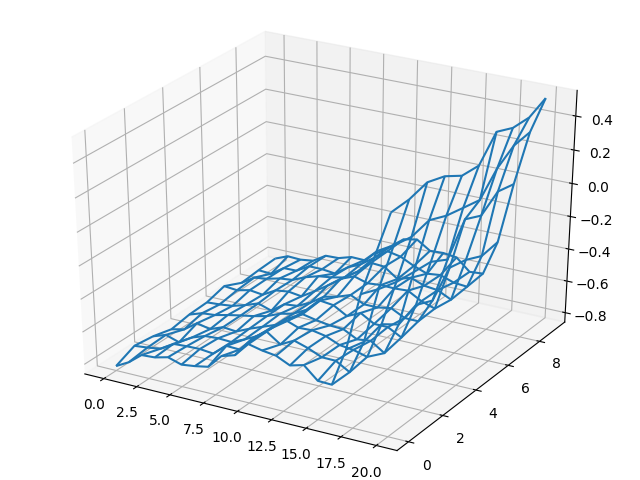

<IPython.core.display.Javascript object>


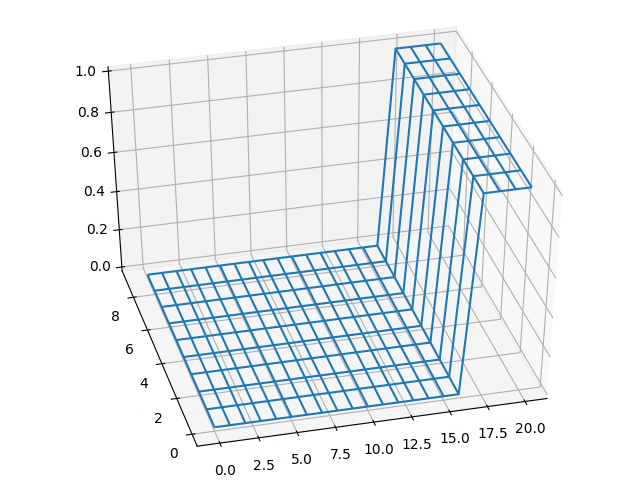

In [29]:
# Params
n_0 = 100
total_episodes = 100000

# Globals
env = Easy21Environment()

# Vars
visits = env.getEmptyQSpace()
q_estimate = env.getEmptyQSpace()
actions = 2

def getStateVisits( state ):
    """
    Sum over actions for state
    """
    return np.sum( visits[ tuple( state ) ] )

def getEpsilon( state ):
    state_visits = getStateVisits( state )
    return n_0 / ( n_0 + state_visits )

def epsilonGreedy( state, should_print=False ):
    epsilon = getEpsilon( state )
    if( random.random() > epsilon ): # Act greedy 
        return q_estimate[ tuple( state ) ].argmax()
    else:
        if should_print:
            print( epsilon )
            print( "Exploring" )
        return random.randint( 0, actions-1 )
    
def getStep( state ):
    return 1 / visits[ tuple( state ) ]

for i in range( total_episodes ):
    # Run Episode
    state = Easy21State()
    used_state_actions = []
    total_reward = 0
    while not state.terminal:
        action = epsilonGreedy( state.state(), should_print=( i == total_episodes - 1 ) )
        used_state_actions.append( np.append( state.state(), action ) )
        state, reward = env.step( state, action )
        total_reward += reward

    # Learn
    for used_state_action in used_state_actions:
        if i == total_episodes - 1:
            print( used_state_action )
        visits[ tuple( used_state_action ) ] += 1
        estimate = q_estimate[ tuple( used_state_action ) ]
        error = total_reward - estimate
        step = getStep( used_state_action )
        new_estimate = estimate + error * getStep( used_state_action )
        q_estimate[ tuple( used_state_action ) ] = new_estimate

plotQ( np.max( q_estimate, axis=2 ) )
plotQ( np.argmax( q_estimate, axis=2 ) )